# The Spark Foundation-GRIP- Data Science and Business Analytics-Aug21

## Author: Deepti Taram

### Task 1: Prediction using Supervised Machine Learning

- we have to predict the percentage of the score of a student based on number of hours he/she studied. This task has two variable where the target value is the percentage score and feature is the number of hours studied.

#### Firstly Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Reading data from given link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

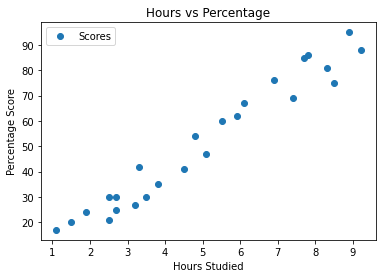

In [20]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

In [7]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

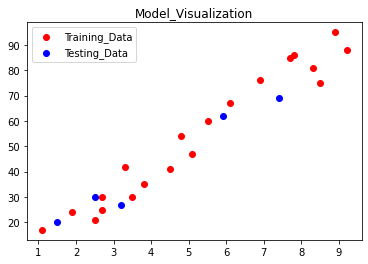

In [9]:
plt.scatter(X_train,y_train,label = 'Training_Data', color='r')
plt.scatter(X_test,y_test,label = 'Testing_Data',color ='b')
plt.legend()
plt.title("Model_Visualization")
plt.show()

## Training the Algorithm¶
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete")

Training complete


Now our model is trained, it's time to visualize the best-fit line of regression

## Plotting the regression line

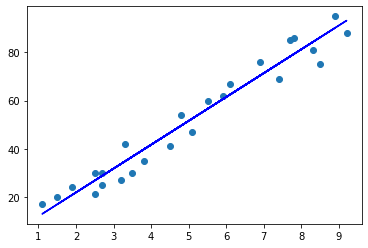

In [11]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,label = 'data')
plt.plot(X, line,label='line',color='b');
plt.show()

## Making Predictions¶

Now that we have trained our algorithm, it's time to make some predictions

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# Estimating the traning and test score
print("Training score:",regressor.score(X_train,y_train))
print("Test score:",regressor.score(X_test,y_test))

Training score: 0.9515510725211552
Test score: 0.9454906892105356


In [17]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the Algorithm

- The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Result:

- After analysing we have got predicted score around 93 based on the number of study hours i.e., 9.25 hrs/day
